In [ ]:
from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')

# Path to my saved zip
zip_path = "/content/drive/MyDrive/dataset_split.zip"

# Extract it into the Colab session
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content")

!ls /content

Mounted at /content/drive
drive  sample_data  test  train  val


In [ ]:
base_split_path = "/content"

print("Train classes:", os.listdir(os.path.join(base_split_path, "train"))[:5])

Train classes: ['Tomato_Leaf_Mold', 'Pepper__bell___Bacterial_spot', 'Tomato__Tomato_mosaic_virus', 'Tomato_Bacterial_spot', 'Tomato__Target_Spot']


In [ ]:
from torchvision import transforms

# Normalization values (ImageNet)
mean = [0.485, 0.456, 0.406]
std  = [0.229, 0.224, 0.225]

# Train transform (with augmentations)
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),              # resize
    transforms.RandomRotation(25),              # random rotation
    transforms.RandomHorizontalFlip(),          # horizontal flip
    transforms.ColorJitter(brightness=0.2,
                           contrast=0.2),       # brightness & contrast
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

# Validation transform (no augmentation)
val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

# Test transform (same as validation)
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

In [ ]:
from torchvision import datasets

# Define dataset paths
train_dir = os.path.join(base_split_path, "train")
val_dir   = os.path.join(base_split_path, "val")
test_dir  = os.path.join(base_split_path, "test")

# Create datasets
train_dataset = datasets.ImageFolder(root=train_dir, transform=train_transform)
val_dataset   = datasets.ImageFolder(root=val_dir, transform=val_transform)
test_dataset  = datasets.ImageFolder(root=test_dir, transform=test_transform)

# Quick check
print("Train samples:", len(train_dataset))
print("Val samples:", len(val_dataset))
print("Test samples:", len(test_dataset))
print("Classes:", train_dataset.classes[:5])

Train samples: 14441
Val samples: 4127
Test samples: 2070
Classes: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [ ]:
from torch.utils.data import DataLoader

# Choose batch size
batch_size = 32

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Quick check
for images, labels in train_loader:
    print("Image batch shape:", images.shape)
    print("Label batch shape:", labels.shape)
    break

Image batch shape: torch.Size([32, 3, 224, 224])
Label batch shape: torch.Size([32])


Train dataset size: 14441
Val dataset size: 4127
Test dataset size: 2070


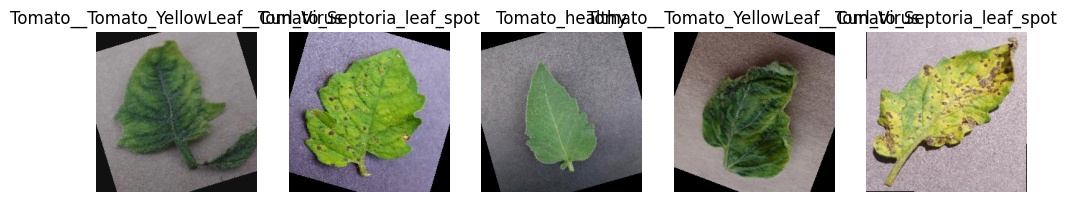

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Print dataset sizes
print("Train dataset size:", len(train_dataset))
print("Val dataset size:", len(val_dataset))
print("Test dataset size:", len(test_dataset))

# 2. Visualize a few images from the training loader
images, labels = next(iter(train_loader))   # get one batch

# Function to unnormalize an image (reverse of transforms.Normalize)
def imshow(img):
    img = img.numpy().transpose((1, 2, 0))   # CHW -> HWC
    mean = np.array([0.485, 0.456, 0.406])
    std  = np.array([0.229, 0.224, 0.225])
    img = std * img + mean   # unnormalize
    img = np.clip(img, 0, 1)
    plt.imshow(img)
    plt.axis("off")

# Plot first 5 images from the batch
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(1, 5, i+1)
    imshow(images[i])
    plt.title(train_dataset.classes[labels[i]])
plt.show()